In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

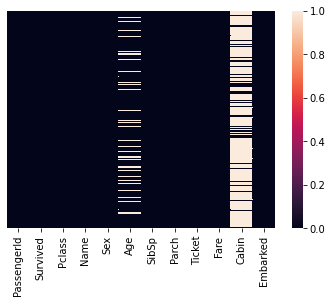

In [7]:
sns.heatmap(train.isnull(),yticklabels=False)

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.drop('Cabin', axis =1, inplace=True)

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

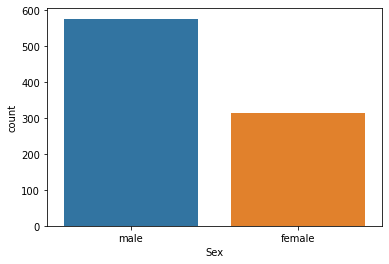

In [11]:
sns.countplot(x = 'Sex', data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

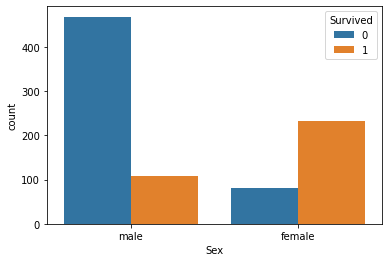

In [12]:
sns.countplot(x = 'Sex', hue= 'Survived', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

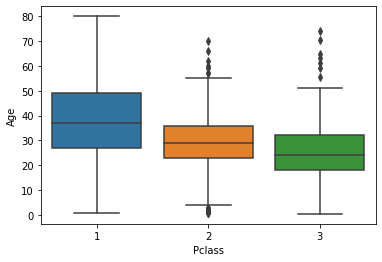

In [13]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [14]:
def replaceAge(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age) : 
        if Pclass == 1 :
            return train[train['Pclass'] == Pclass]['Age'].mean()
        elif Pclass == 2 :
            return train[train['Pclass'] == Pclass]['Age'].mean()
        else:
            return train[train['Pclass'] == Pclass]['Age'].mean()
    else:
        return Age

In [15]:
train['Age'] = train[['Pclass','Age']].apply(replaceAge,axis = 1)

In [16]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
train.dropna(inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
train_final = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [20]:
train_final = pd.get_dummies(train_final,columns = ['Pclass', 'Sex','Embarked'],drop_first=True)

In [21]:
train_final.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,3.0,1,0,7.2500,0,1,1,0,1
1,1,1.0,1,0,71.2833,0,0,0,0,0
2,1,3.0,0,0,7.9250,0,1,0,0,1
3,1,1.0,1,0,53.1000,0,0,0,0,1
4,0,3.0,0,0,8.0500,0,1,1,0,1


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logisticRegressor = LogisticRegression()

In [24]:
model = logisticRegressor.fit(train_final.drop('Survived', axis=1), train_final['Survived'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
train_predictions = logisticRegressor.predict(train_final.drop('Survived', axis = 1))

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(train_final['Survived'], train_predictions))

[[480  69]
 [109 231]]


In [29]:
print(classification_report(train_final['Survived'], train_predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       549
           1       0.77      0.68      0.72       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.78       889
weighted avg       0.80      0.80      0.80       889



In [30]:
test = pd.read_csv('test.csv')

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [34]:
test['Age'] = test[['Age', 'Pclass']].apply(replaceAge,axis=1)

In [36]:
test.dropna(inplace = True)

In [40]:
test_final = pd.get_dummies(test,columns = ['Sex','Pclass','Embarked'] ,drop_first=True)

In [41]:
test_final.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,1,0,1,1,0
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [42]:
test_predictions = logisticRegressor.predict(test_final)

In [43]:
test_final['Survived'] = test_predictions

In [44]:
test_final.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,34.5,0,0,7.8292,1,0,1,1,0,0
1,47.0,1,0,7.0000,0,0,1,0,1,0
2,62.0,0,0,9.6875,1,1,0,1,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,0
4,22.0,1,1,12.2875,0,0,1,0,1,0


In [117]:
train_final.head(10)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,3.0,1,0,7.2500,0,1,1,0,1
1,1,1.0,1,0,71.2833,0,0,0,0,0
2,1,3.0,0,0,7.9250,0,1,0,0,1
3,1,1.0,1,0,53.1000,0,0,0,0,1
4,0,3.0,0,0,8.0500,0,1,1,0,1
5,0,3.0,0,0,8.4583,0,1,1,1,0
6,0,1.0,0,0,51.8625,0,0,1,0,1
7,0,3.0,3,1,21.0750,0,1,1,0,1
8,1,3.0,0,2,11.1333,0,1,0,0,1
9,1,2.0,1,0,30.0708,1,0,0,0,0


In [116]:
test_final[test_final['Survived'] == 1]

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
22,1.00,0,0,31.6833,0,0,0,0,1,1
41,1.00,0,0,26.5500,1,0,0,0,1,1
54,2.00,0,0,15.5792,1,1,0,0,0,1
65,2.00,0,0,21.0000,0,1,0,0,1,1
84,2.00,0,0,10.7083,1,1,0,1,0,1
89,2.00,1,1,23.0000,1,1,0,0,1,1
146,1.00,0,0,51.8625,1,0,0,0,1,1
148,1.00,0,0,26.5500,1,0,0,0,1,1
168,1.00,0,0,27.7208,0,0,0,0,0,1
191,1.00,0,0,26.0000,1,0,0,0,1,1


In [46]:
model.score(train_final.drop('Survived', axis = 1),train_final['Survived'])

0.7997750281214848

In [47]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [99]:
url = 'http://127.0.0.1:5000/'

In [100]:
import json, requests

In [111]:
# sample data
data = {'Age': 1
        ,'SibSp' : 1
      , 'Parch': 0
        ,'Fare'  : 7.2500
      , 'Sex_male': 1
      , 'Pclass_2': 0
        ,'Pclass_3':1
       ,'Embarked_Q': 0
       ,'Embarked_S': 1}
data = json.dumps(data)

In [110]:
# sample data
data1 = {'Age': 3.0
        ,'SibSp' : 1
      , 'Parch': 0
        ,'Fare'  : 71.2833
      , 'Sex_male': 0
      , 'Pclass_2': 0
        ,'Pclass_3':0
       ,'Embarked_Q': 0
       ,'Embarked_S': 0}
data1 = json.dumps(data1)

In [102]:
data1

'{"Age": 3.0, "SibSp": 1, "Parch": 0, "Fare": 71.2833, "Sex_male": 0, "Pclass_2": 0, "Pclass_3": 0, "Embarked_Q": 0, "Embarked_S": 0}'

In [112]:
data

'{"Age": 1, "SibSp": 1, "Parch": 0, "Fare": 7.25, "Sex_male": 1, "Pclass_2": 0, "Pclass_3": 1, "Embarked_Q": 0, "Embarked_S": 1}'

In [113]:
sreq

<Response [200]>

In [114]:
sreq = requests.post(url, data)

In [115]:
sreq.json()

{'results': {'results': 0}}

In [118]:
pip3 freeze

SyntaxError: invalid syntax (<ipython-input-118-2a5add7e4511>, line 1)